# Project: Wrangling and Analyze Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline


## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:

archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import the required libraries
import requests
import os

# Make directory for the tweet image predictions if it doesn't exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (os.path.join(folder_name, 'image_predictions.tsv'), mode='wb') as file:
    file.write(response.content)
image_df=pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

This part of the code is hidden to comply with Twitter  Developer guideline rules


``consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'``


In [4]:

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        # Catch exceptions raised for the 404 HTTP status code
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 258


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 259


Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833:

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [5]:
#read data from txt file and load it into a list.
data = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))


In [6]:
# read data from the list row by row into columns
df_list=[]
for item in data:
    df_list.append({'tweet_id':item['id'],
                  'retweet_count':item['retweet_count'],
                  'favorite_count':item['favorite_count']})
    
# create a dataframe and upload data to it
json_df=pd.DataFrame(df_list, columns = ['tweet_id','retweet_count', 'favorite_count'],index=range(len(data)))
# convert the dataframe to a csv file
json_df.to_csv('tweet_json.csv', sep=',')
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29218
2,891815181378084864,3464,21976
3,891689557279858688,7191,36785
4,891327558926688256,7715,35178


## Assessing Data

Assess the dataframe both visually and programmatically.
Create a function `assess` to assess the dataframes programmatically through the `info()` and `isna()` functions.

In [7]:
# create a function to programmatically assess the dataframes
def assess(dataframe):
    
    info=dataframe.info()
    duplicated_values=dataframe.duplicated().sum()
    missing_values=dataframe.isna().sum()
#     print out the assessments made
    result=print('info:'+str(info)+'\n\nMissing values: \n'+str(missing_values))
    
    return result


### 1. Twitter Archive 


In [8]:
#visual assessment
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
# unique denominator rating values
archive_df.rating_denominator.unique()


array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [10]:
# assess the twitter archive dataframe
print(assess(archive_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Image Predictions

In [11]:
# Visual assessment 
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
# assess the image predictions dataframe
print(assess(image_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
info:None

Missing values: 
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
None


In [13]:
# sum of duplicated jpg.url 
image_df.jpg_url.duplicated().sum()

66

In [14]:
# check the dog breed values
image_df.p1

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [15]:
# check dog names
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### 3. Additional json

In [16]:
# Visually assessing additional json data
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29218
2,891815181378084864,3464,21976
3,891689557279858688,7191,36785
4,891327558926688256,7715,35178
...,...,...,...
2320,666049248165822465,36,88
2321,666044226329800704,115,246
2322,666033412701032449,36,100
2323,666029285002620928,39,112


In [17]:
# assess the additional json data 
print(assess(json_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB
info:None

Missing values: 
tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64
None


### Quality issues
1. Twitter Archive
    
    * There are retweets in the dataset.
    * Incorrect datatype(timestamp)
    * Denominator ratings are more than 10 in some rows.
    * Dog names have incorrect values such as all, O and an

2. Image Predictions
    * Duplicated jpg_url values.
    * Inconsistency in capitilazing first letters of p1,p2 and p3
    * Incorrect dog breed values in different columns.
    


* Drop the columns that won't be used for analysis
 


### Tidiness issues
1. Twitter Archive 
    * Two variables in one column i.e date and time in timestamp column.
    * Columns(doggo,floofer,pupper and puppo) are dog types and are in different columns.

2. The three datasets should be part of one table.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 



In [18]:
# Make copies of original pieces of data
archive_df_clean=archive_df.copy()
image_df_clean=image_df.copy()
json_df_clean=json_df.copy()

### Quality #1: Retweets in the dataset(Twitter Archive)

#### Define

Drop rows that are retweets and keep the original tweets.

#### Code

In [19]:
# Filter and keep data with null retweet status id values
archive_df_clean=archive_df_clean[pd.isnull(archive_df_clean.retweeted_status_id)]

#### Test

In [20]:
archive_df_clean.retweeted_status_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: retweeted_status_id
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 34.0 KB


### Quality #2: Incorrect datatype(Twitter Archive)

#### Define
Change timestamp datatype from object to datetime.

#### Code

In [21]:
#change to datetime
archive_df_clean.timestamp=pd.to_datetime(archive_df_clean.timestamp)

#### Test

In [22]:
# chack for datatype
archive_df_clean.timestamp.info

<bound method Series.info of 0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2175, dtype: datetime64[ns, UTC]>

### Quality #3: Duplicated jpg_url values(Image Prediction)

#### Define
Drop the 66 duplicated jpg_url values 

#### Code

In [23]:
# drop duplicated values of jpg_url
image_df_clean.drop_duplicates(subset='jpg_url',inplace=True)

#### Test

In [24]:
# Number of duplicated jpg_url rows
image_df_clean.jpg_url.duplicated().sum()

0

### Quality #4:Dog names have values such as all, a and an

#### Define
Replace incorrect name values with Nan

#### Code

In [25]:
# define a function to replace incorrect name values with 'None'
def incorrect_name(row):
    if row['name'][0].islower()== True:
        return 'None'
    else:
        return row['name']
#     call the function
archive_df['name']= archive_df.apply(incorrect_name,axis=1)
# replace 'None' with np.nan
archive_df['name'].replace('None', np.nan, inplace=True)

In [26]:
#check name values
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### Test

### Quality #5:Inconsistency in capitilazing first letters of p1,p2 and p3(Image Prediction)

#### Define
Capitalize the first letter of the values.


#### Code

In [27]:
#Capitalize first letter of p1, p2 and p3 colu
image_df_clean.p1 =image_df_clean.p1.str.capitalize()
image_df_clean.p2 =image_df_clean.p2.str.capitalize()
image_df_clean.p3 =image_df_clean.p3.str.capitalize()

#### Test

In [28]:
image_df_clean.p1

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071               Paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2009, dtype: object

In [29]:
image_df_clean.p2

0                   Collie
1       Miniature_pinscher
2                 Malinois
3                  Redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              Malamute
2073              Pekinese
2074                 Bagel
Name: p2, Length: 2009, dtype: object

In [30]:
image_df_clean.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        Bloodhound
3                Miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2009, dtype: object

### Quality #6 Incorrect dog breed values in different columns

#### Define
Drop incorrect all values that are not dogs and merge into one column.

#### Code

In [31]:
# function to return dog breed when the photo is a dog
def dog_breed(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

image_df_clean['dog_breed'] = image_df_clean.apply(dog_breed, axis = 1)
    

#### Test

In [32]:
image_df_clean['dog_breed'] 

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       NaN
Name: dog_breed, Length: 2009, dtype: object

### Quality #7:Denominator ratings are more than 10 in some rows

#### Define
Drop the rows with denominator_rating above 10.

#### Code

In [33]:
# drop rows with denominator ratings other than 10
archive_df_clean.drop(archive_df_clean[archive_df_clean.rating_denominator != 10].index, inplace = True)

#### Test

In [34]:
archive_df_clean.rating_denominator.unique()

array([10], dtype=int64)

### Tidiness #1: Two variables in one column.

#### Define
Create coulmns date and time and separate date and time values from timestamp column.

#### Code

In [35]:
# Split the date and time values
archive_df_clean['date']= archive_df_clean['timestamp'].dt.date
archive_df_clean['time']= archive_df_clean['timestamp'].dt.time

#### Test

In [36]:
archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Tidiness #2: Dog types in different columns(Twitter Archive)

#### Define
Create a new column dog_types and merge doggo,floofer,pupper and puppo columns into it.

#### Code

In [37]:
#create a column dog_type and extract the dog type values to the column.
archive_df_clean['dog_type'] = archive_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [38]:
archive_df_clean.dog_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Tidiness #3: All dataframes should be part of one dataset

#### Define:
Merge the three datasets.

#### Code

In [39]:
# Merge the copy of the datasets
archive_master_clean=archive_df_clean.merge(image_df_clean,on='tweet_id').merge(json_df_clean,on='tweet_id')

#### Test

In [40]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1966 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   1966 non-null   datetime64[ns, UTC]
 4   source                      1966 non-null   object             
 5   text                        1966 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1966 non-null   object             
 10  rating_numerator            1966 non-null   int64           

### Quality #8: Columns that are not needed.

#### Define
Drop the columns that aren't needed.

#### Code

In [41]:
archive_master_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper','puppo','img_num','p1','p1_dog','p2','p2_dog','p3','p3_dog'],axis=1,inplace=True)

#### Test

In [42]:
archive_master_clean


,tweet_id,text,rating_numerator,rating_denominator,name,date,time,dog_type,jpg_url,p1_conf,p2_conf,p3_conf,dog_breed,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,0.097049,0.085851,0.076110,NaN,6969,33696
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,0.090647,0.068957,Chihuahua,5272,29218
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,0.078253,0.031379,Chihuahua,3464,21976
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.170278,0.168086,0.040836,Labrador_retriever,7191,36785
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,0.225770,0.175219,Basset,7715,35178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,2015-11-16,00:24:50,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,0.243682,0.154629,Miniature_pinscher,36,88
1962,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,2015-11-16,00:04:52,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,0.360687,0.222752,Rhodesian_ridgeback,115,246
1963,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,2015-11-15,23:21:54,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,0.138584,0.116197,German_shepherd,36,100
1964,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,2015-11-15,23:05:30,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,0.074192,0.072010,Redbone,39,112


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
# store the cleaned dataframe to a CSV file
archive_master_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

## 1. Analysis

In [44]:
archive_master_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,date,time,dog_type,jpg_url,p1_conf,p2_conf,p3_conf,dog_breed,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,0.097049,0.085851,0.076110,NaN,6969,33696
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,0.090647,0.068957,Chihuahua,5272,29218
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,0.078253,0.031379,Chihuahua,3464,21976
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.170278,0.168086,0.040836,Labrador_retriever,7191,36785
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,0.225770,0.175219,Basset,7715,35178


In [45]:
archive_master_clean.shape

(1966, 15)

In [46]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1966 non-null   int64  
 1   text                1966 non-null   object 
 2   rating_numerator    1966 non-null   int64  
 3   rating_denominator  1966 non-null   int64  
 4   name                1966 non-null   object 
 5   date                1966 non-null   object 
 6   time                1966 non-null   object 
 7   dog_type            316 non-null    object 
 8   jpg_url             1966 non-null   object 
 9   p1_conf             1966 non-null   float64
 10  p2_conf             1966 non-null   float64
 11  p3_conf             1966 non-null   float64
 12  dog_breed           1659 non-null   object 
 13  retweet_count       1966 non-null   int64  
 14  favorite_count      1966 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 245.8+

In [47]:
archive_master_clean.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.966000e+03,1966.000000,1966.0,1966.000000,1.966000e+03,1.966000e+03,1966.000000,1966.000000
mean,7.358383e+17,11.698372,10.0,0.593150,1.347619e-01,6.024715e-02,2232.356562,7694.950153
std,6.758383e+16,40.954963,0.0,0.272172,1.006415e-01,5.075285e-02,4000.427271,11348.509066
min,6.660209e+17,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.757183e+17,10.000000,10.0,0.360437,5.415522e-02,1.612658e-02,491.250000,1622.500000
50%,7.082494e+17,11.000000,10.0,0.587222,1.184015e-01,4.959335e-02,1076.500000,3471.000000
75%,7.879824e+17,12.000000,10.0,0.843883,1.955197e-01,9.166433e-02,2552.000000,9540.250000
max,8.924206e+17,1776.000000,10.0,1.000000,4.880140e-01,2.710420e-01,70330.000000,144245.000000


### 1. The relationship between rating and retweet & favorite count .

In [48]:
# relationship between rating and retweet_count
retweet_rating=archive_master_clean.groupby('retweet_count').rating_numerator
retweet_rating.mean().sort_values().nlargest(10),display()

(retweet_count
 2269    1776.000000
 7555     420.000000
 5704      75.000000
 1490      27.000000
 438       15.333333
 5056      14.000000
 9809      14.000000
 5564      14.000000
 5710      14.000000
 5104      14.000000
 Name: rating_numerator, dtype: float64,
 None)

In [49]:
# relationship between rating and favorite_count
retweet_rating=archive_master_clean.groupby('favorite_count').rating_numerator
retweet_rating.mean().sort_values().nlargest(10),display()

(favorite_count
 4765     1776.0
 22014     420.0
 17318      75.0
 6174       27.0
 1571       26.0
 42880      14.0
 53810      14.0
 43279      14.0
 8928       14.0
 57746      14.0
 Name: rating_numerator, dtype: float64,
 None)

### 2. Top 10 most retweeted dogs.

In [50]:
#group data by retweet_count and display the name of dogs
archive_master_clean.groupby('name').retweet_count.mean().sort_values().nlargest(10),display()

(name
 Stephan    51423.0
 Duddles    37262.0
 Jamesy     30055.0
 Hurley     16933.0
 Aja        15734.0
 Lilly      15364.0
 Canela     14952.0
 Pipsy      14563.0
 Kenneth    13858.5
 Ken        13527.0
 Name: retweet_count, dtype: float64,
 None)

### 3. Top 10 favorite dogs

In [51]:
#group data by favorite_count and display the name of dogs
archive_master_clean.groupby('name').favorite_count.mean().sort_values().nlargest(10),display()

(name
 Stephan    111185.0
 Jamesy     108493.0
 Duddles     92499.0
 Aja         69037.0
 Lilly       62245.0
 Canela      59976.0
 Pipsy       42132.0
 Barney      41086.0
 such        40586.0
 Alfy        39037.0
 Name: favorite_count, dtype: float64,
 None)

### Insights:
1. There is no specific relationship between rating and retweet & favorite count.

2.  The name of the dog with the highest retweet count is Stephan.

3. The name of the dog with the highest favorite count is Stephan.

## Visualization

### 1. The top 5 dog breed with the highest rating.

In [52]:
# mean of the ratings per dog breed
dog_breed_rating=archive_master_clean.groupby('dog_breed').rating_numerator
dog_breed_rating.mean()

dog_breed
Afghan_hound                       9.666667
Airedale                           9.833333
American_staffordshire_terrier    10.133333
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
Welsh_springer_spaniel             9.500000
West_highland_white_terrier       10.066667
Whippet                           10.181818
Wire-haired_fox_terrier           11.500000
Yorkshire_terrier                 10.200000
Name: rating_numerator, Length: 113, dtype: float64

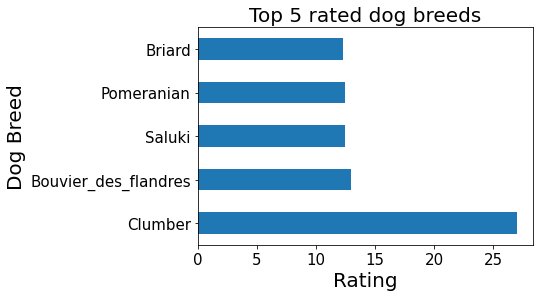

In [53]:
# Plot bar graph of the top 5 dog breeds with the highest rating
dog_breed_rating.mean().sort_values(ascending=False).nlargest(5).plot(kind='barh',fontsize=15)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Dog Breed', fontsize=20)
plt.title("Top 5 rated dog breeds", size=20);

The dog breed with the highest rating is __Clumber__.


In [54]:
# Filter the data to get the url of Clumber
clumber=archive_master_clean.query('dog_breed=="Clumber"',inplace = True)
archive_master_clean

,tweet_id,text,rating_numerator,rating_denominator,name,date,time,dog_type,jpg_url,p1_conf,p2_conf,p3_conf,dog_breed,retweet_count,favorite_count
546,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,2016-09-20,00:24:34,NaN,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,0.946718,0.01595,0.006519,Clumber,1490,6174


In [55]:
# Display a photo of the highest rated dog breed
Image(url='https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')